In [1]:
import cv2
cv2.__version__

'4.10.0'

# Chapter 4 이미지 프로세싱 기초

In [2]:
%cd /home/somyeong/Doosan_Robotics/Doosan-Robotics/AI(computer_vision)/open_cv/insightbook.opencv_project_python/04.img_processing

/home/somyeong/Doosan_Robotics/Doosan-Robotics/AI(computer_vision)/open_cv/insightbook.opencv_project_python/04.img_processing


/home/somyeong/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## 4.1 관심영역

In [4]:
!python3 roi.py

(50, 50, 3)
qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"
100


In [4]:
import cv2
import numpy as np

img= cv2.imread('../img/sunset.jpg')
print(img.shape)
x=320; y=150; w=50; h=50  #roi 좌표
roi = img[y:y+h, x:x+w]   #roi 지정

print(roi.shape)          #roi shape, (50, 50, 3)
cv2.rectangle(roi, (0,0), (h-1, w-1), (0, 255, 0))  #roi 전체에 사각형 그리기

key = cv2.waitKey(0)
print(key)
cv2.destroyAllWindows()

(338, 600, 3)
(50, 50, 3)
-1


ROI 배열 복제

In [5]:
!python3 roi_copy.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [8]:
import cv2
import numpy as np

img = cv2.imread('../img/sunset.jpg')

x=320; y=150; w=50; h=50
roi = img[y:y+h, x:x+w]         #roi 지정
img2 = roi.copy()               #roi 배열 복제

img[y:y+h, x+w: x+w+w]= roi     #새로운 좌표에 roi 추가, 태양 2개
cv2.rectangle(img, (x,y), (x+w+w, y+h), (0, 255, 0))  #2개의 태양 영역에 사각형 표시

cv2.imshow("img", img)
cv2.imshow("roi", img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


### 4.1.2 마우스로 관심영역 지정

In [6]:
!python3 roi_crop_mouse.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"
x:448, y:42, w:116, h:290
croped.


In [11]:
import cv2
import numpy as np

isDragging = False                      # 마우스 드래그 상태 저장
x0, y0, w, h = -1,-1,-1,-1              # 영역 선택 좌표 저장
blue, red = (255,0,0),(0,0,255)         # 색상 값

def onMouse(event,x,y,flags,param):     # 마우스 이벤트 핸들 함수  ---①
    global isDragging, x0, y0, img      # 전역변수 참조
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 마우스 버튼 다운, 드래그 시작 ---②
        isDragging = True
        x0 = x
        y0 = y
    elif event == cv2.EVENT_MOUSEMOVE:  # 마우스 움직임 ---③
        if isDragging:                  # 드래그 진행 중
            img_draw = img.copy()       # 사각형 그림 표현을 위한 이미지 복제
            cv2.rectangle(img_draw, (x0, y0), (x, y), blue, 2) # 드래그 진행 영역 표시
            cv2.imshow('img', img_draw) # 사각형 표시된 그림 화면 출력
    elif event == cv2.EVENT_LBUTTONUP:  # 왼쪽 마우스 버튼 업 ---④
        if isDragging:                  # 드래그 중지
            isDragging = False
            w = x - x0                  # 드래그 영역 폭 계산
            h = y - y0                  # 드래그 영역 높이 계산
            print("x:%d, y:%d, w:%d, h:%d" % (x0, y0, w, h))
            if w > 0 and h > 0:         # 폭과 높이가 음수이면 드래그 방향이 옳음 ---⑤
                img_draw = img.copy()   # 선택 영역에 사각형 그림을 표시할 이미지 복제
                # 선택 영역에 빨간 사각형 표시
                cv2.rectangle(img_draw, (x0, y0), (x, y), red, 2)
                cv2.imshow('img', img_draw) # 빨간 사각형 그려진 이미지 화면 출력
                #cv2_imshow(img_draw) # 빨간 사각형 그려진 이미지 화면 출력
                roi = img[y0:y0+h, x0:x0+w] # 원본 이미지에서 선택 영영만 ROI로 지정 ---⑥
                cv2.imshow('cropped', roi)  # ROI 지정 영역을 새창으로 표시
                #cv2_imshow(roi)  # ROI 지정 영역을 새창으로 표시
                cv2.moveWindow('cropped', 0, 0) # 새창을 화면 좌측 상단에 이동
                cv2.imwrite('./cropped.jpg', roi)   # ROI 영역만 파일로 저장 ---⑦
                print("croped.")
            else:
                cv2.imshow('img', img)  # 드래그 방향이 잘못된 경우 사각형 그림ㅇㅣ 없는 원본 이미지 출력
                print("좌측 상단에서 우측 하단으로 영역을 드래그 하세요.")

img = cv2.imread('../img/sunset.jpg')
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse) # 마우스 이벤트 등록 ---⑧
cv2.waitKey()
cv2.destroyAllWindows()

x:313, y:147, w:71, h:69
croped.


In [7]:
!python3 roi_select_img.py

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [ ]:
import cv2,  numpy as np

img = cv2.imread('../img/sunset.jpg')

x,y,w,h	=	cv2.selectROI('img', img, False)
if w and h:
    roi = img[y:y+h, x:x+w]
    cv2.imshow('cropped', roi)  # ROI 지정 영역을 새창으로 표시
    cv2.moveWindow('cropped', 0, 0) # 새창을 화면 좌측 상단에 이동
    cv2.imwrite('./cropped2.jpg', roi)   # ROI 영역만 파일로 저장

cv2.imshow('img', img)
#cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 4.2 컬러 스페이스

### 4.2.1 디지털 영상의 종류

### 4.2.2 RGB, BGR, RGBA

In [8]:
!python3 rgba.py

default (120, 98, 3) color (120, 98, 3) unchanged (120, 98, 4)
qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [2]:
import cv2
import numpy as np

# 기본 값 옵션
img = cv2.imread('../img/opencv_logo.png')      # BGR
# IMREAD_COLOR 옵션
bgr = cv2.imread('../img/opencv_logo.png', cv2.IMREAD_COLOR)      # BGR
# IMREAD_UNCHANGED 옵션
bgra = cv2.imread('../img/opencv_logo.png', cv2.IMREAD_UNCHANGED)     # BGRA   #알파브랜딩까지 포함하여 bgra 총 채널 4개
# 각 옵션에 따른 이미지 shape
print("default", img.shape, "color", bgr.shape, "unchanged", bgra.shape)

cv2.imshow('bgr', bgr)
cv2.imshow('bgra', bgra)
cv2.imshow('alpha', bgra[:,:,3])  # 알파 채널만 표시
#cv2_imshow(bgr)
#cv2_imshow(bgra)
#cv2_imshow(bgra[:,:,3])  # 알파 채널만 표시
cv2.waitKey(0)
cv2.destroyAllWindows()

[ WARN:0@0.010] global loadsave.cpp:241 findDecoder imread_('../img/opencv_logo.png'): can't open/read file: check file path/integrity
[ WARN:0@0.010] global loadsave.cpp:241 findDecoder imread_('../img/opencv_logo.png'): can't open/read file: check file path/integrity
[ WARN:0@0.011] global loadsave.cpp:241 findDecoder imread_('../img/opencv_logo.png'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

### 4.2.3 칼라 스페이스 변환

In [9]:
!python3 bgr2gray.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [16]:
import cv2
import numpy as np

img = cv2.imread('../img/girl.jpg')

img2 = img.astype(np.uint16)                # dtype 변경 ---①
b,g,r = cv2.split(img2)                     # 채널 별로 분리 ---②
#b,g,r = img2[:,:,0], img2[:,:,1], img2[:,:,2]
gray1 = ((b + g + r)/3).astype(np.uint8)    # 평균 값 연산후 dtype 변경 ---③  #픽셀값을 계산해서 흑백으로 변경

gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # BGR을 그레이 스케일로 변경 ---④  #cvtColor 함수를 이용해 흑백으로 변경
cv2.imshow('original', img)
cv2.imshow('gray1', gray1)
cv2.imshow('gray2', gray2)
#cv2_imshow(img)
#cv2_imshow(gray1)
#cv2_imshow(gray2)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 4.2.4 HSV, HSI, HSL

In [10]:
!python3 bgr2hsv.py

red: [[[  0 255 255]]]
green: [[[ 60 255 255]]]
blue [[[120 255 255]]]
yellow [[[ 30 255 255]]]


In [11]:
import cv2
import numpy as np

#---① BGR 컬러 스페이스로 원색 픽셀 생성
red_bgr = np.array([[[0,0,255]]], dtype=np.uint8)   # 빨강 값만 갖는 픽셀
green_bgr = np.array([[[0,255,0]]], dtype=np.uint8) # 초록 값만 갖는 픽셀
blue_bgr = np.array([[[255,0,0]]], dtype=np.uint8)  # 파랑 값만 갖는 픽셀
yellow_bgr = np.array([[[0,255,255]]], dtype=np.uint8) # 노랑 값만 갖는 픽셀

#---② BGR 컬러 스페이스를 HSV 컬러 스페이스로 변환
red_hsv = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV);
green_hsv = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV);
blue_hsv = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV);
yellow_hsv = cv2.cvtColor(yellow_bgr, cv2.COLOR_BGR2HSV);

#---③ HSV로 변환한 픽셀 출력
print("red:",red_hsv)
print("green:", green_hsv)
print("blue", blue_hsv)
print("yellow", yellow_hsv)

red: [[[  0 255 255]]]
green: [[[ 60 255 255]]]
blue [[[120 255 255]]]
yellow [[[ 30 255 255]]]


### 4.2.5 YUL, YCbCr

In [12]:
!python3 bgr2yuv.py

dark: [[[  0 128 128]]]
middle: [[[127 128 128]]]
bright [[[255 128 128]]]


In [13]:
import cv2
import numpy as np

#---① BGR 컬러 스페이스로 3가지 밝기의 픽셀 생성
dark = np.array([[[0,0,0]]], dtype=np.uint8)        # 3 채널 모두 0인 가장 어두운 픽셀
middle = np.array([[[127,127,127]]], dtype=np.uint8) # 3 채널 모두 127인 중간 밝기 픽셀
bright = np.array([[[255,255,255]]], dtype=np.uint8) # 3 채널 모두 255인 가장 밝은 픽셀

#---② BGR 컬러 스페이스를 YUV 컬러 스페이스로 변환
dark_yuv = cv2.cvtColor(dark, cv2.COLOR_BGR2YUV)
middle_yuv = cv2.cvtColor(middle, cv2.COLOR_BGR2YUV)
bright_yuv = cv2.cvtColor(bright, cv2.COLOR_BGR2YUV)

#---③ YUV로 변환한 픽셀 출력
print("dark:",dark_yuv)
print("middle:", middle_yuv)
print("bright", bright_yuv)

dark: [[[  0 128 128]]]
middle: [[[127 128 128]]]
bright [[[255 128 128]]]


## 4.3 스레시 홀딩

### 4.3.1 전역 스레시홀딩

In [14]:
!python3 threshold.py

127.0
Figure(640x480)


127.0


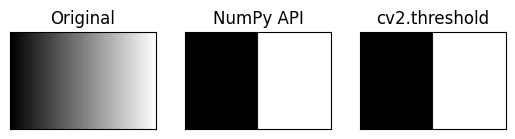

In [15]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('../img/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE) #이미지를 그레이 스케일로 읽기

# --- ① NumPy API로 바이너리 이미지 만들기
thresh_np = np.zeros_like(img)   # 원본과 동일한 크기의 0으로 채워진 이미지
thresh_np[ img > 127] = 255      # 127 보다 큰 값만 255로 변경  #127보다 크면 참, 127보다 작으면 거짓  #거짓이면 그대로 두고 참이면 변경

# ---② OpenCV API로 바이너리 이미지 만들기
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
print(ret)  # 127.0, 바이너리 이미지에 사용된 문턱 값 반환

# ---③ 원본과 결과물을 matplotlib으로 출력
imgs = {'Original': img, 'NumPy API':thresh_np, 'cv2.threshold': thresh_cv}
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

In [23]:
!python3 threshold_flag.py

Figure(640x480)


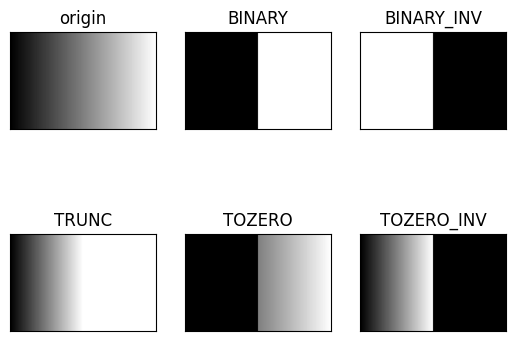

In [16]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('../img/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE)

_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {'origin':img, 'BINARY':t_bin, 'BINARY_INV':t_bininv, \
        'TRUNC':t_truc, 'TOZERO':t_2zr, 'TOZERO_INV':t_2zrinv}

for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]);    plt.yticks([])

plt.show()

### 4.3.2 오츠의 알고리즘

In [25]:
!python3 threshold_otsu.py

otsu threshold: 131.0
Figure(640x480)


otsu threshold: 131.0


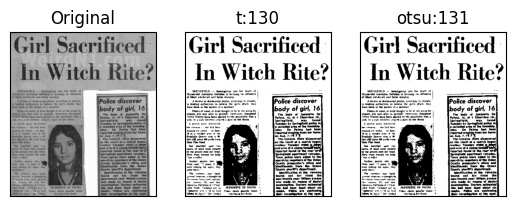

In [17]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지를 그레이 스케일로 읽기
img = cv2.imread('../img/scaned_paper.jpg', cv2.IMREAD_GRAYSCALE)
# 경계 값을 130으로 지정  ---①
_, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)
# 경계 값을 지정하지 않고(-1) OTSU 알고리즘 선택 ---②
t, t_otsu = cv2.threshold(img, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('otsu threshold:', t)                 # Otsu 알고리즘으로 선택된 경계 값 출력

imgs = {'Original': img, 't:130':t_130, 'otsu:%d'%t: t_otsu}
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

### 4.3.3 적응형 스레시홀드

In [27]:
!python3 threshold_adpted.py

Figure(640x480)


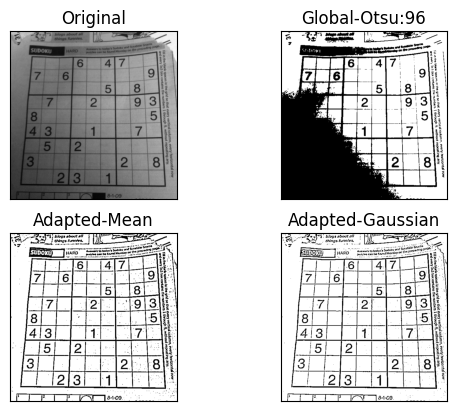

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

blk_size = 9        # 블럭 사이즈
C = 5               # 차감 상수
img = cv2.imread('../img/sudoku.png', cv2.IMREAD_GRAYSCALE) # 그레이 스케일로  읽기

# ---① 오츠의 알고리즘으로 단일 경계 값을 전체 이미지에 적용
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# ---② 어뎁티드 쓰레시홀드를 평균과 가우시안 분포로 각각 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                     cv2.THRESH_BINARY, blk_size, C)

# ---③ 결과를 Matplot으로 출력
imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, \
        'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

plt.show()

## 4.4 이미지 연산

### 4.4.1 영상과 영상의 연산

In [19]:
!python3 arithmatic.py

[[ 44 150]] [[255 150]]
[[100 206]] [[100   0]]
[[144 100]] [[255 100]]
[[66.66666667 16.66666667]] [[67 17]]


In [20]:
import cv2
import numpy as np

# ---① 연산에 사용할 배열 생성
a = np.uint8([[200, 50]])
b = np.uint8([[100, 100]])

#---② NumPy 배열 직접 연산
add1 = a + b
sub1 = a - b
mult1 = a * 2
div1 = a / 3

# ---③ OpenCV API를 이용한 연산
add2 = cv2.add(a, b)
sub2 = cv2.subtract(a, b)
mult2 = cv2.multiply(a , 2)
div2 = cv2.divide(a, 3)

#---④ 각 연산 결과 출력
print(add1, add2)
print(sub1, sub2)
print(mult1, mult2)
print(div1, div2)

[[ 44 150]] [[255 150]]
[[100 206]] [[100   0]]
[[144 100]] [[255 100]]
[[66.66666667 16.66666667]] [[67 17]]


In [21]:
!python3 arithmatic_mask.py

[[11  0]]
[[11 20]] [[10 20]]


In [22]:
import cv2
import numpy as np

#---① 연산에 사용할 배열 생성
a = np.array([[1, 2]], dtype=np.uint8)
b = np.array([[10, 20]], dtype=np.uint8)
#---② 2번째 요소가 0인 마스크 배열 생성
mask = np.array([[1, 0]], dtype=np.uint8)

#---③ 누적 할당과의 비교 연산
c1 = cv2.add( a, b , None, mask)
print(c1)
c2 = cv2.add( a, b , b.copy(), mask)
print(c2, b)

[[11  0]]
[[11 20]] [[10 20]]


### 4.4.2 알파 블렌딩

In [34]:
!python3 blending_simple.py

Figure(640x480)


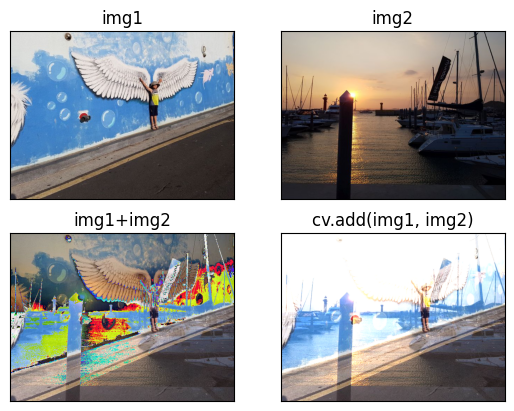

In [35]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# ---① 연산에 사용할 이미지 읽기
img1 = cv2.imread('../img/wing_wall.jpg')
img2 = cv2.imread('../img/yate.jpg')

# ---② 이미지 덧셈
img3 = img1 + img2  # 더하기 연산
img4 = cv2.add(img1, img2) # OpenCV 함수

imgs = {'img1':img1, 'img2':img2, 'img1+img2': img3, 'cv.add(img1, img2)': img4}

# ---③ 이미지 출력
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2, i + 1)
    plt.imshow(v[:,:,::-1])
    plt.title(k)
    plt.xticks([]); plt.yticks([])

plt.show()

In [23]:
!python3 blending_alpha.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [37]:
import cv2
import numpy as np

alpha = 0.5 # 합성에 사용할 알파 값

#---① 합성에 사용할 영상 읽기
img1 = cv2.imread('../img/wing_wall.jpg')
img2 = cv2.imread('../img/yate.jpg')

# ---② NumPy 배열에 수식을 직접 연산해서 알파 블렌딩 적용
blended = img1 * alpha + img2 * (1-alpha)
blended = blended.astype(np.uint8) # 소수점 발생을 제거하기 위함
cv2.imshow('img1 * alpha + img2 * (1-alpha)', blended)
#cv2_imshow(blended)

# ---③ addWeighted() 함수로 알파 블렌딩 적용
dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)
cv2.imshow('cv2.addWeighted', dst)
#cv2_imshow(dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
!python3 blending_alpha_trackbar.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [40]:
import cv2
import numpy as np

win_name = 'Alpha blending'     # 창 이름
trackbar_name = 'fade'          # 트렉바 이름

# ---① 트렉바 이벤트 핸들러 함수
def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0)
    cv2.imshow(win_name, dst)


# ---② 합성 영상 읽기
img1 = cv2.imread('../img/man_face.jpg')
img2 = cv2.imread('../img/lion_face.jpg')

# ---③ 이미지 표시 및 트렉바 붙이기
cv2.imshow(win_name, img1)
#cv2_imshow(img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey()
cv2.destroyAllWindows()

### 4.4.3 비트와이즈 연산

In [41]:
!python3 bitwise.py

Figure(640x480)


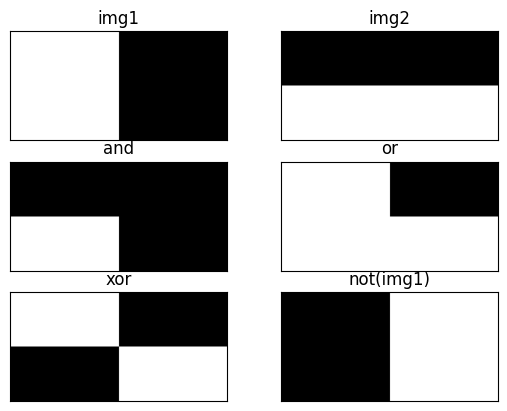

In [42]:
import numpy as np, cv2
import matplotlib.pylab as plt

#--① 연산에 사용할 이미지 생성
img1 = np.zeros( ( 200,400), dtype=np.uint8)
img2 = np.zeros( ( 200,400), dtype=np.uint8)
img1[:, :200] = 255         # 왼쪽은 흰색(255), 오른쪽은 검정색(0)
img2[100:200, :] = 255      # 위쪽은 검정색(0), 아래쪽은 흰색(255)

#--② 비트와이즈 연산
bitAnd = cv2.bitwise_and(img1, img2)
bitOr = cv2.bitwise_or(img1, img2)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot = cv2.bitwise_not(img1)

#--③ Plot으로 결과 출력
imgs = {'img1':img1, 'img2':img2, 'and':bitAnd,
          'or':bitOr, 'xor':bitXor, 'not(img1)':bitNot}
for i, (title, img) in enumerate(imgs.items()):
    plt.subplot(3,2,i+1)
    plt.title(title)
    plt.imshow(img, 'gray')
    plt.xticks([]); plt.yticks([])

plt.show()

In [25]:
!python3 bitwise_masking.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [44]:
import numpy as np, cv2
import matplotlib.pylab as plt

#--① 이미지 읽기
img = cv2.imread('../img/girl.jpg')

#--② 마스크 만들기
mask = np.zeros_like(img)
cv2.circle(mask, (150,140), 100, (255,255,255), -1)
#cv2.circle(대상이미지, (원점x, 원점y), 반지름, (색상), 채우기)

#--③ 마스킹
masked = cv2.bitwise_and(img, mask)

#--④ 결과 출력
cv2.imshow('original', img)
cv2.imshow('mask', mask)
cv2.imshow('masked', masked)
#cv2_imshow(img)
#cv2_imshow(mask)
#cv2_imshow(masked)
cv2.waitKey()
cv2.destroyAllWindows()

In [26]:
!python3 bitwise_masking2.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [47]:
import numpy as np, cv2
import matplotlib.pylab as plt

#--① 이미지 읽기
img = cv2.imread('../img/girl.jpg')

#--② 마스크 만들기
mask = np.zeros(img.shape[:2], dtype=np.uint8)
cv2.circle(mask, (150,140), 100, (255), -1)
#cv2.circle(대상이미지, (원점x, 원점y), 반지름, (색상), 채우기)

#--③ 마스킹
masked = cv2.bitwise_and(img, img, mask=mask)

#--④ 결과 출력
cv2.imshow('original', img)
cv2.imshow('mask', mask)
cv2.imshow('masked', masked)
#cv2_imshow(img)
#cv2_imshow(mask)
#cv2_imshow(masked)
cv2.waitKey()
cv2.destroyAllWindows()

### 4.4.4 차영상

In [27]:
!python3 diff_absolute.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [49]:
import numpy as np, cv2

#--① 연산에 필요한 영상을 읽고 그레이스케일로 변환
img1 = cv2.imread('../img/robot_arm1.jpg')
img2 = cv2.imread('../img/robot_arm2.jpg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#--② 두 영상의 절대값 차 연산
diff = cv2.absdiff(img1_gray, img2_gray)

#--③ 차 영상을 극대화 하기 위해 쓰레시홀드 처리 및 컬러로 변환
_, diff = cv2.threshold(diff, 1, 255, cv2.THRESH_BINARY)
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
diff_red[:,:,2] = 0

#--④ 두 번째 이미지에 변화 부분 표시
spot = cv2.bitwise_xor(img2, diff_red)

#--⑤ 결과 영상 출력
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('diff', diff)
cv2.imshow('spot', spot)
#cv2_imshow(img1)
#cv2_imshow(img2)
#cv2_imshow(diff)
#cv2_imshow(spot)
cv2.waitKey()
cv2.destroyAllWindows()

### 4.4.5 이미지 합성과 마스킹

In [29]:
!python3 addition_rgba_mask.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [51]:
import cv2
import numpy as np

#--① 합성에 사용할 영상 읽기, 전경 영상은 4채널 png 파일
img_fg = cv2.imread('../img/opencv_logo.png', cv2.IMREAD_UNCHANGED)
img_bg = cv2.imread('../img/girl.jpg')

#--② 알파채널을 이용해서 마스크와 역마스크 생성
_, mask = cv2.threshold(img_fg[:,:,3], 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

#--③ 전경 영상 크기로 배경 영상에서 ROI 잘라내기
img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)
h, w = img_fg.shape[:2]
roi = img_bg[10:10+h, 10:10+w ]

#--④ 마스크 이용해서 오려내기
masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask)
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

#--⑥ 이미지 합성
added = masked_fg + masked_bg
img_bg[10:10+h, 10:10+w] = added

cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.imshow('masked_fg', masked_fg)
cv2.imshow('masked_bg', masked_bg)
cv2.imshow('added', added)
cv2.imshow('result', img_bg)

#cv2_imshow(mask)
#cv2_imshow(mask_inv)
#cv2_imshow(masked_fg)
#cv2_imshow(masked_bg)
#cv2_imshow(added)
#cv2_imshow(img_bg)

cv2.waitKey()
cv2.destroyAllWindows()

In [30]:
!python3 hsv_color_mask.py

Figure(640x480)


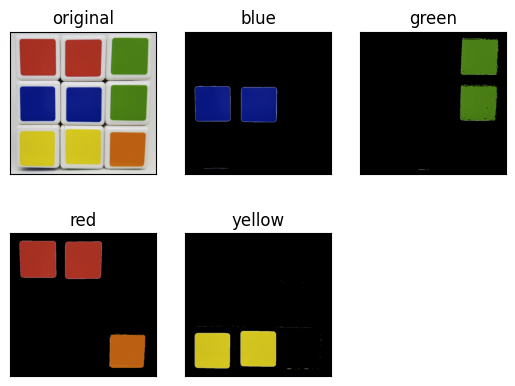

In [31]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 큐브 영상 읽어서 HSV로 변환
img = cv2.imread("../img/cube.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#--② 색상별 영역 지정
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255,255])
green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255])
red1 = np.array([0, 50,50])
red2 = np.array([15, 255,255])
red3 = np.array([165, 50,50])
red4 = np.array([180, 255,255])
yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255])

# --③ 색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

#--④ 색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

#--⑤ 결과 출력
imgs = {'original': img, 'blue':res_blue, 'green':res_green,
                            'red':res_red, 'yellow':res_yellow}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()

In [32]:
!python3 chromakey.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [55]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 크로마키 배경 영상과 합성할 배경 영상 읽기
img1 = cv2.imread('../img/man_chromakey.jpg')  #사람 이미지
img2 = cv2.imread('../img/street.jpg')         #배경 이미지

#--② ROI 선택을 위한 좌표 계산
height1, width1 = img1.shape[:2]
height2, width2 = img2.shape[:2]
x = (width2 - width1)//2
y = height2 - height1
w = x + width1
h = y + height1

#--③ 크로마키 배경 영상에서 크로마키 영역을 10픽셀 정도로 지정
chromakey = img1[:10, :10, :]
offset = 20

#--④ 크로마키 영역과 영상 전체를 HSV로 변경
hsv_chroma = cv2.cvtColor(chromakey, cv2.COLOR_BGR2HSV)
hsv_img = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

#--⑤ 크로마키 영역의 H값에서 offset 만큼 여유를 두어서 범위 지정
# offset 값은 여러차례 시도 후 결정
#chroma_h = hsv_chroma[0]
chroma_h = hsv_chroma[:,:,0]
lower = np.array([chroma_h.min()-offset, 100, 100])
upper = np.array([chroma_h.max()+offset, 255, 255])

#--⑥ 마스크 생성 및 마스킹 후 합성
mask = cv2.inRange(hsv_img, lower, upper)
mask_inv = cv2.bitwise_not(mask)
roi = img2[y:h, x:w]
fg = cv2.bitwise_and(img1, img1, mask=mask_inv)
bg = cv2.bitwise_and(roi, roi, mask=mask)
img2[y:h, x:w] = fg + bg

#--⑦ 결과 출력
cv2.imshow('chromakey', img1)
cv2.imshow('added', img2)
#cv2_imshow(img1)
#cv2_imshow(img2)
cv2.waitKey()
cv2.destroyAllWindows()

In [33]:
!python3 seamlessclone.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [57]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 합성 대상 영상 읽기
img1 = cv2.imread("../img/drawing.jpg")
img2= cv2.imread("../img/my_hand.jpg")

#--② 마스크 생성, 합성할 이미지 전체 영역을 255로 셋팅
mask = np.full_like(img1, 255)

#--③ 합성 대상 좌표 계산(img2의 중앙)
height, width = img2.shape[:2]
center = (width//2, height//2)

#--④ seamlessClone 으로 합성
normal = cv2.seamlessClone(img1, img2, mask, center, cv2.NORMAL_CLONE)
mixed = cv2.seamlessClone(img1, img2, mask, center, cv2.MIXED_CLONE)

#--⑤ 결과 출력
cv2.imshow('normal', normal)
cv2.imshow('mixed', mixed)
#cv2_imshow(normal)
#cv2_imshow(mixed)
cv2.waitKey()
cv2.destroyAllWindows()

## 4.5 히스토그램

### 4.5.1 히스토그램 계산과 표시

In [58]:
!python3 histo_gray.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"
hist.shape: (256, 1)
hist.sum(): 270000.0 img.shape: (450, 600)
Figure(640x480)


hist.shape: (256, 1)
hist.sum(): 270000.0 img.shape: (450, 600)


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


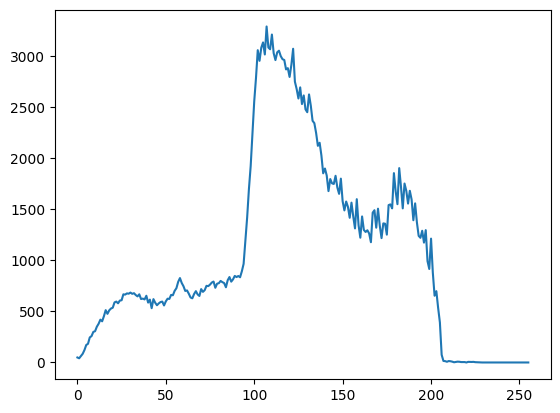

: 

In [34]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 이미지 그레이 스케일로 읽기 및 출력
img = cv2.imread('../img/mountain.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('img', img)
#cv2_imshow(img)

#--② 히스토그램 계산 및 그리기
hist = cv2.calcHist([img], [0], None, [256], [0,255])
plt.plot(hist)

print("hist.shape:", hist.shape)  #--③ 히스토그램의 shape (256,1)
print("hist.sum():", hist.sum(), "img.shape:",img.shape) #--④ 히스토그램 총 합계와 이미지의 크기
plt.show()

In [6]:
!python3 histo_rgb.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"
Figure(640x480)


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


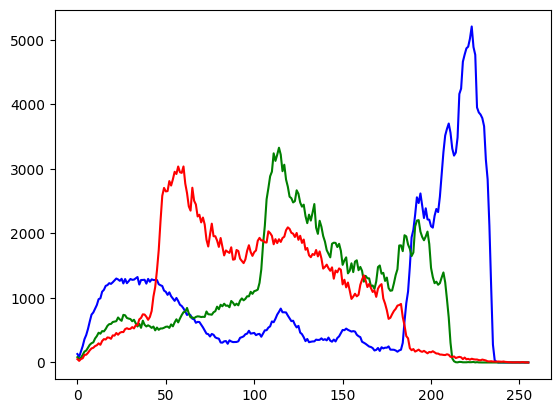

: 

In [3]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 이미지 읽기 및 출력
img = cv2.imread('../img/mountain.jpg')
cv2.imshow('img', img)
#cv2_imshow(img)

#--② 히스토그램 계산 및 그리기
channels = cv2.split(img)
colors = ('b', 'g', 'r')
for (ch, color) in zip (channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 255])
    plt.plot(hist, color = color)
plt.show()

### 4.5.2 노멀라이즈

In [2]:
!python3 histo_normalize.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"
Figure(640x480)


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


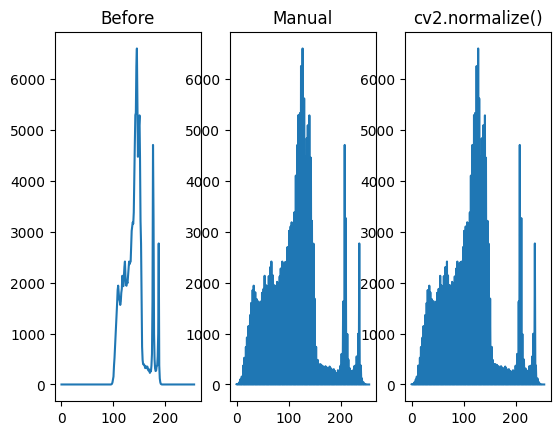

: 

In [3]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 그레이 스케일로 영상 읽기
img = cv2.imread('../img/abnormal.jpg', cv2.IMREAD_GRAYSCALE)

#--② 직접 연산한 정규화
img_f = img.astype(np.float32)
img_norm = ((img_f - img_f.min()) * (255) / (img_f.max() - img_f.min()))
img_norm = img_norm.astype(np.uint8)

#--③ OpenCV API를 이용한 정규화
img_norm2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

#--④ 히스토그램 계산
hist = cv2.calcHist([img], [0], None, [256], [0, 255])
hist_norm = cv2.calcHist([img_norm], [0], None, [256], [0, 255])
hist_norm2 = cv2.calcHist([img_norm2], [0], None, [256], [0, 255])

cv2.imshow('Before', img)
cv2.imshow('Manual', img_norm)
cv2.imshow('cv2.normalize()', img_norm2)

#cv2_imshow(img)
#cv2_imshow(img_norm)
#cv2_imshow(img_norm2)

hists = {'Before' : hist, 'Manual':hist_norm, 'cv2.normalize()':hist_norm2}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()

### 4.5.3 이퀄라이즈

In [4]:
!python3 histo_equalize.py

(256,)
qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"
Figure(640x480)


(256,)


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


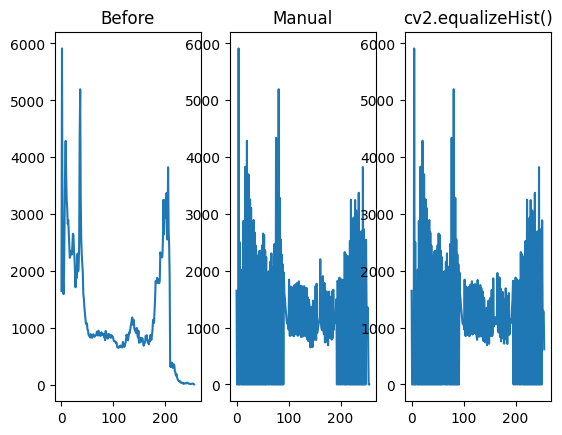

: 

In [5]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 대상 영상으로 그레이 스케일로 읽기
img = cv2.imread('../img/yate.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape[:2]

#--② 이퀄라이즈 연산을 직접 적용
hist = cv2.calcHist([img], [0], None, [256], [0, 256])  #히스토그램 계산
#   cv2.calcHist 함수는 입력 이미지의 히스토그램을 계산합니다.
#   [img]: 입력 이미지(그레이스케일로 가정).
#   [0]: 히스토그램을 계산할 채널 번호. 0은 그레이스케일 이미지의 단일 채널을 의미합니다.
#   None: 마스크를 사용하지 않음.
#   [256]: 히스토그램 빈(bin)의 수. 여기서는 256개의 빈을 사용하여 0~255 사이의 모든 픽셀 값을 커버합니다.
#   [0, 256]: 히스토그램 범위. 픽셀 값 범위는 0에서 255까지입니다.
#   결과: hist는 256개의 빈을 가지는 히스토그램 배열입니다. 각 값은 해당 픽셀 값이 이미지에서 몇 번 나타났는지를 나타냅니다.

cdf = hist.cumsum()                                     # 누적 히스토그램
#   cdf: 누적 분포 함수(Cumulative Distribution Function)입니다.
#   hist.cumsum()은 hist의 값을 누적합으로 계산합니다. 즉, cdf[i]는 hist[0]에서 hist[i]까지의 모든 값을 더한 결과입니다.
#   결과: cdf는 히스토그램의 누적합을 나타내는 배열입니다. 이는 히스토그램 균등화를 수행하는 데 사용됩니다.

cdf_m = np.ma.masked_equal(cdf, 0)                      # 0(zero)인 값을 NaN으로 제거
#   np.ma.masked_equal(cdf, 0): cdf 배열에서 0인 값을 마스킹하여 무시하도록 설정합니다. np.ma.masked_equal은 지정한 값(여기서는 0)과 같은 요소를 마스킹합니다.
#   이는 이미지에 빈도수가 0인 픽셀 값(즉, 이미지에 존재하지 않는 픽셀 값)을 무시하도록 합니다.
#   결과: cdf_m은 0을 제외한 cdf 배열의 값을 포함한 마스크 배열입니다.

cdf_m = (cdf_m - cdf_m.min()) /(rows * cols) * 255      # 이퀄라이즈 히스토그램 계산
#   cdf_m - cdf_m.min(): cdf_m의 최소값을 뺍니다. 이 연산은 cdf_m을 0에서 시작하도록 정규화하는 과정입니다.
#   /(rows * cols): 이 부분은 누적 분포를 이미지의 총 픽셀 수(행과 열의 곱)로 나눔으로써, cdf_m을 확률 분포 함수(PDF)로 변환합니다.
#   * 255: 이제 PDF 값을 다시 0에서 255 사이의 값으로 확장합니다. 이는 히스토그램 균등화를 통해 픽셀 값의 분포를 확장하는 과정입니다.
#   결과: cdf_m은 0에서 255 사이의 값을 가지는 이퀄라이즈된 히스토그램입니다.

cdf = np.ma.filled(cdf_m,0).astype('uint8')             # NaN을 다시 0으로 환원
#   np.ma.filled(cdf_m, 0): 마스킹된 배열에서 마스크된 값을 0으로 채웁니다.
#   astype('uint8'): 결과 배열을 uint8 형식으로 변환하여 이미지의 픽셀 값 범위(0-255)와 일치시킵니다.
#   결과: cdf는 이제 히스토그램 균등화를 적용한 매핑 테이블로, 각 픽셀 값을 이퀄라이즈된 값으로 변환하기 위한 값들을 담고 있습니다.

print(cdf.shape)
img2 = cdf[img]                                         # 히스토그램을 픽셀로 맵핑
#   cdf[img]: 이 라인은 원본 이미지 img의 각 픽셀 값을 cdf에서 대응되는 값으로 매핑합니다.
#   예를 들어, 만약 img의 픽셀 값이 50이라면, cdf[50]에 해당하는 값으로 픽셀 값을 대체합니다.


#--③ OpenCV API로 이퀄라이즈 히스토그램 적용
img3 = cv2.equalizeHist(img)

#--④ 이퀄라이즈 결과 히스토그램 계산
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])

#--⑤ 결과 출력
cv2.imshow('Before', img)
cv2.imshow('Manual', img2)
cv2.imshow('cv2.equalizeHist()', img3)

#cv2_imshow(img)
#cv2_imshow(img2)
#cv2_imshow(img3)

hists = {'Before':hist, 'Manual':hist2, 'cv2.equalizeHist()':hist3}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()

In [3]:
!python3 histo_equalize_yuv.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [ ]:
import numpy as np, cv2

img = cv2.imread('../img/yate.jpg') #이미지 읽기, BGR 스케일

#--① 컬러 스케일을 BGR에서 YUV로 변경
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

#--② YUV 컬러 스케일의 첫번째 채널에 대해서 이퀄라이즈 적용
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

#--③ 컬러 스케일을 YUV에서 BGR로 변경
img2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

cv2.imshow('Before', img)
cv2.imshow('After', img2)

#cv2_imshow(img)
#cv2_imshow(img2)

cv2.waitKey()
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


### 4.5.4 CLAHE

In [4]:
!python3 histo_clahe.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [5]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--①이미지 읽어서 YUV 컬러스페이스로 변경
img = cv2.imread('../img/bright.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

#--② 밝기 채널에 대해서 이퀄라이즈 적용
img_eq = img_yuv.copy()
img_eq[:,:,0] = cv2.equalizeHist(img_eq[:,:,0])
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

#--③ 밝기 채널에 대해서 CLAHE 적용
img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8)) #CLAHE 생성
img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])           #CLAHE 적용
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

#--④ 결과 출력
cv2.imshow('Before', img)
cv2.imshow('CLAHE', img_clahe)
cv2.imshow('equalizeHist', img_eq)

#cv2_imshow(img)
#cv2_imshow(img_clahe)
#cv2_imshow(img_eq)

cv2.waitKey()
cv2.destroyAllWindows()

### 4.5.2 2D 히스토그램

In [6]:
!python3 histo_2d.py

Figure(640x480)


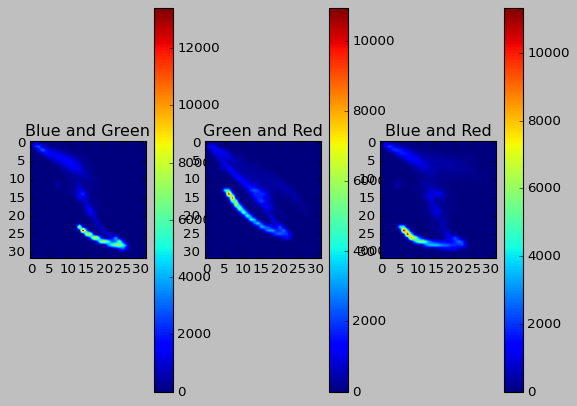

In [7]:
import cv2
import matplotlib.pylab as plt

plt.style.use('classic')            # --①컬러 스타일을 1.x 스타일로 사용
img = cv2.imread('../img/mountain.jpg')

plt.subplot(131)
hist = cv2.calcHist([img], [0,1], None, [32,32], [0,256,0,256]) #--②
p = plt.imshow(hist)                                            #--③
plt.title('Blue and Green')                                     #--④
plt.colorbar(p)                                                 #--⑤


plt.subplot(132)
hist = cv2.calcHist([img], [1,2], None, [32,32], [0,256,0,256]) #--⑥
p = plt.imshow(hist)
plt.title('Green and Red')
plt.colorbar(p)

plt.subplot(133)
hist = cv2.calcHist([img], [0,2], None, [32,32], [0,256,0,256]) #--⑦
p = plt.imshow(hist)
plt.title('Blue and Red')
plt.colorbar(p)

plt.show()

### 4.5.6 역투영

In [8]:
!python3 histo_backproject.py

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

win_name = 'back_projection'
img = cv2.imread('../img/pump_horse.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
draw = img.copy()

#--⑤ 역투영된 결과를 마스킹해서 결과를 출력하는 공통함수
def masking(bp, win_name):
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    cv2.filter2D(bp,-1,disc,bp)
    _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_and(img, img, mask=mask)
    #cv2.imshow(win_name, result)
    cv2_imshow(result)

#--⑥ 직접 구현한 역투영 함수
def backProject_manual(hist_roi):
    #--⑦ 전체 영상에 대한 H,S 히스토그램 계산
    hist_img = cv2.calcHist([hsv_img], [0,1], None,[180,256], [0,180,0,256])
    #--⑧ 선택영역과 전체 영상에 대한 히스토그램 그램 비율계산
    hist_rate = hist_roi/ (hist_img + 1)
    #--⑨ 비율에 맞는 픽셀 값 매핑
    h,s,v = cv2.split(hsv_img)
    bp = hist_rate[h.ravel(), s.ravel()]

    bp = np.minimum(bp, 1)
    bp = bp.reshape(hsv_img.shape[:2])
    cv2.normalize(bp,bp, 0, 255, cv2.NORM_MINMAX)
    bp = bp.astype(np.uint8)
    #--⑩ 역 투영 결과로 마스킹해서 결과 출력
    masking(bp,'result_manual')

# OpenCV API로 구현한 함수 ---⑪
def backProject_cv(hist_roi):
    # 역투영 함수 호출 ---⑫
    bp = cv2.calcBackProject([hsv_img], [0, 1], hist_roi,  [0, 180, 0, 256], 1)
    # 역 투영 결과로 마스킹해서 결과 출력 ---⑬
    masking(bp,'result_cv')

# ROI 선택 ---①
(x,y,w,h) = cv2.selectROI(win_name, img, False)
if w > 0 and h > 0:
    #roi = draw[y:y+h, x:x+w]
    roi = img[y:y+h, x:x+w]
    cv2.rectangle(draw, (x, y), (x+w, y+h), (0,0,255), 2)
    #--② 선택한 ROI를 HSV 컬러 스페이스로 변경
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    #--③ H,S 채널에 대한 히스토그램 계산
    hist_roi = cv2.calcHist([hsv_roi],[0, 1], None, [180, 256], [0, 180, 0, 256] )
    #--④ ROI의 히스토그램을 매뉴얼 구현함수와 OpenCV 이용하는 함수에 각각 전달
    backProject_manual(hist_roi)
    backProject_cv(hist_roi)
cv2.imshow(win_name, draw)
#cv2_imshow(draw)
cv2.waitKey()
cv2.destroyAllWindows()

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


#### 4.5.7 히스토그램 비교

In [5]:
!python3 histo_compare.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"
CORREL    	img1:   1.00	img2:   0.70	img3:   0.56	img4:   0.23	
CHISQR    	img1:   0.00	img2:  67.33	img3:  35.71	img4:1129.49	
INTERSECT 	img1:   1.00	img2:   0.54	img3:   0.40	img4:   0.18	
BHATTACHARYYA	img1:   0.00	img2:   0.48	img3:   0.47	img4:   0.79	
Figure(640x480)


CORREL    	img1:   1.00	img2:   0.70	img3:   0.56	img4:   0.23	
CHISQR    	img1:   0.00	img2:  67.33	img3:  35.71	img4:1129.49	
INTERSECT 	img1:   1.00	img2:   0.54	img3:   0.40	img4:   0.18	
BHATTACHARYYA	img1:   0.00	img2:   0.48	img3:   0.47	img4:   0.79	


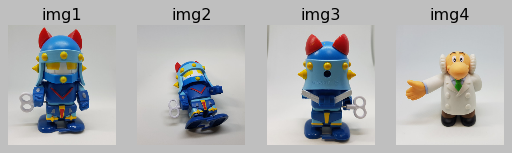

: 

In [11]:
import cv2, numpy as np
import matplotlib.pylab as plt

img1 = cv2.imread('../img/taekwonv1.jpg')
img2 = cv2.imread('../img/taekwonv2.jpg')
img3 = cv2.imread('../img/taekwonv3.jpg')
img4 = cv2.imread('../img/dr_ochanomizu.jpg')

cv2.imshow('query', img1)
#cv2_imshow(img1)
imgs = [img1, img2, img3, img4]
hists = []
for i, img in enumerate(imgs) :
    plt.subplot(1,len(imgs),i+1)
    plt.title('img%d'% (i+1))
    plt.axis('off')
    plt.imshow(img[:,:,::-1])
    #---① 각 이미지를 HSV로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #---② H,S 채널에 대한 히스토그램 계산
    hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0, 256])
    #---③ 0~1로 정규화
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)


query = hists[0]
methods = {'CORREL' :cv2.HISTCMP_CORREL, 'CHISQR':cv2.HISTCMP_CHISQR,
           'INTERSECT':cv2.HISTCMP_INTERSECT,
           'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}
for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        #---④ 각 메서드에 따라 img1과 각 이미지의 히스토그램 비교
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT: #교차 분석인 경우
            ret = ret/np.sum(query)        #비교대상으로 나누어 1로 정규화
        print("img%d:%7.2f"% (i+1 , ret), end='\t')
    print()
plt.show()

## 4.6 실전 워크숍

### 4.6.1 반해골 괴물 얼굴 합성

In [3]:
!python3 workshop_two_face.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"
0 1.0 0.0
1 0.9895833333333333 0.01041666666666674
2 0.9791666666666667 0.02083333333333326
3 0.96875 0.03125
4 0.9583333333333333 0.04166666666666674
5 0.9479166666666667 0.05208333333333326
6 0.9375 0.0625
7 0.9270833333333333 0.07291666666666674
8 0.9166666666666667 0.08333333333333326
9 0.90625 0.09375
10 0.8958333333333333 0.10416666666666674
11 0.8854166666666667 0.11458333333333326
12 0.875 0.125
13 0.8645833333333333 0.13541666666666674
14 0.8541666666666667 0.14583333333333326
15 0.84375 0.15625
16 0.8333333333333333 0.16666666666666674
17 0.8229166666666665 0.17708333333333348
18 0.8125 0.1875
19 0.8020833333333333 0.19791666666666674
20 0.7916666666666665 0.20833333333333348
21 0.78125 0.21875
22 0.7708333333333333 0.22916666666666674
23 0.7604166666666665 0.23958333333333348
24 0.75 0.25
25 0.7395833333333333 0.26041666666666674
26 0.72916666

In [4]:
import cv2
import numpy as np

# 영상의 15%를 알파 블렌딩의 범위로 지정
alpha_width_rate = 15

# 합성할 두 영상 읽기
img_face = cv2.imread('../img/man_face.jpg')
img_skull = cv2.imread('../img/skull.jpg')

# 입력 영상과 같은 크기의 결과 영상 준비
img_comp = np.zeros_like(img_face)

# 연산에 필요한 좌표 계산
height, width = img_face.shape[:2]
middle = width//2                             # 영상의 중앙 좌표
alpha_width = width * alpha_width_rate // 100 # 알파 블렌딩 범위
start = middle - alpha_width//2               # 알파 블렌딩 시작 지점
step = 100/alpha_width                        # 알파 값 간격

# 입력 영상의 절반씩 복사해서 결과 영상에 합성
img_comp[:, :middle, : ] = img_face[:, :middle, :].copy()
img_comp[:, middle:, :] = img_skull[:, middle:, :].copy()
cv2.imshow('half', img_comp)
#cv2_imshow(img_comp)

# 알파 값을 바꾸면서 알파 블렌딩 적용
for i in range(alpha_width+1 ):
    alpha = (100 - step * i) / 100  # 증감 간격에 따른 알파 값 (1~0)
    beta = 1 - alpha                # 베타 값 (0~1)
    # 알파 블렌딩 적용
    img_comp[:, start+i] = img_face[:, start+i] * \
                                alpha + img_skull[:, start+i] * beta
    print(i, alpha, beta)

cv2.imshow('half skull', img_comp)
#cv2_imshow(img_comp)
cv2.waitKey()
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


0 1.0 0.0
1 0.9895833333333333 0.01041666666666674
2 0.9791666666666667 0.02083333333333326
3 0.96875 0.03125
4 0.9583333333333333 0.04166666666666674
5 0.9479166666666667 0.05208333333333326
6 0.9375 0.0625
7 0.9270833333333333 0.07291666666666674
8 0.9166666666666667 0.08333333333333326
9 0.90625 0.09375
10 0.8958333333333333 0.10416666666666674
11 0.8854166666666667 0.11458333333333326
12 0.875 0.125
13 0.8645833333333333 0.13541666666666674
14 0.8541666666666667 0.14583333333333326
15 0.84375 0.15625
16 0.8333333333333333 0.16666666666666674
17 0.8229166666666665 0.17708333333333348
18 0.8125 0.1875
19 0.8020833333333333 0.19791666666666674
20 0.7916666666666665 0.20833333333333348
21 0.78125 0.21875
22 0.7708333333333333 0.22916666666666674
23 0.7604166666666665 0.23958333333333348
24 0.75 0.25
25 0.7395833333333333 0.26041666666666674
26 0.7291666666666665 0.2708333333333335
27 0.71875 0.28125
28 0.7083333333333333 0.29166666666666674
29 0.6979166666666665 0.3020833333333335
30 0

### 4.6.2 모션 감지 CCTV

In [5]:
!python3 workshop_cctv_motion_sensor.py

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/somyeong/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [6]:
import cv2
import numpy as np

# 감도 설정(카메라 품질에 따라 조정 필요)
thresh = 25    # 달라진 픽셀 값 기준치 설정
max_diff = 5   # 달라진 픽셀 갯수 기준치 설정

# 카메라 캡션 장치 준비
a, b, c = None, None, None
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480)      # 프레임 폭을 480으로 설정
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 320)     # 프레임 높이를 320으로 설정

if cap.isOpened():
    ret, a = cap.read()         # a 프레임 읽기
    ret, b = cap.read()         # b 프레임 읽기

    while ret:
        ret, c = cap.read()     # c 프레임 읽기
        draw = c.copy()         # 출력 영상에 사용할 복제본
        if not ret:
            break

        # 3개의 영상을 그레이 스케일로 변경
        a_gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        b_gray = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
        c_gray = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)

        # a-b, b-c 절대 값 차 구하기
        diff1 = cv2.absdiff(a_gray, b_gray)
        diff2 = cv2.absdiff(b_gray, c_gray)

        # 스레시홀드로 기준치 이내의 차이는 무시
        ret, diff1_t = cv2.threshold(diff1, thresh, 255, cv2.THRESH_BINARY)
        ret, diff2_t = cv2.threshold(diff2, thresh, 255, cv2.THRESH_BINARY)

        # 두 차이에 대해서 AND 연산, 두 영상의 차이가 모두 발견된 경우
        diff = cv2.bitwise_and(diff1_t, diff2_t)

        # 열림 연산으로 노이즈 제거 ---①
        k = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
        diff = cv2.morphologyEx(diff, cv2.MORPH_OPEN, k)

        # 차이가 발생한 픽셀이 갯수 판단 후 사각형 그리기
        diff_cnt = cv2.countNonZero(diff)
        if diff_cnt > max_diff:
            nzero = np.nonzero(diff)  # 0이 아닌 픽셀의 좌표 얻기(y[...], x[...])
            cv2.rectangle(draw, (min(nzero[1]), min(nzero[0])), \
                                (max(nzero[1]), max(nzero[0])), (0,255,0), 2)
            cv2.putText(draw, "Motion Detected", (10,30), \
                                cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0,255))

        # 컬러 스케일 영상과 스레시홀드 영상을 통합해서 출력
        stacked = np.hstack((draw, cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)))
        cv2.imshow('motion sensor',stacked )
        #cv2_imshow(stacked )

        # 다음 비교를 위해 영상 순서 정리
        a = b
        b = c

        if cv2.waitKey(1) & 0xFF == 27:
            break

: 

In [2]:
!python3 threshold_flag_cvshow.py

[ WARN:0@0.244] global loadsave.cpp:241 findDecoder imread_('./img/gray_gradient.jpg'): can't open/read file: check file path/integrity
Traceback (most recent call last):
  File "/home/somyeong/Doosan_Robotics/Doosan-Robotics/AI(computer_vision)/open_cv/insightbook.opencv_project_python/04.img_processing/threshold_flag_cvshow.py", line 17, in <module>
    cv2.imshow(key, value)
cv2.error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:973: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'



In [3]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./img/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE)

_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {'origin':img, 'BINARY':t_bin, 'BINARY_INV':t_bininv, \
        'TRUNC':t_truc, 'TOZERO':t_2zr, 'TOZERO_INV':t_2zrinv}

for i, (key, value) in enumerate(imgs.items()):
    cv2.imshow(key, value)
    #cv2_imshow(value)
    if i==3:
        print(value[-1, -1])

cv2.waitKey()
cv2.destroyAllWindows()

[ WARN:0@0.233] global loadsave.cpp:241 findDecoder imread_('./img/gray_gradient.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:973: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [4]:
!python3 thresholds.py

Figure(640x480)


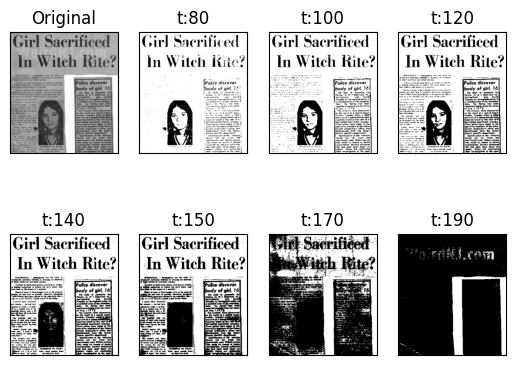

In [5]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('../img/scaned_paper.jpg', cv2.IMREAD_GRAYSCALE) #이미지를 그레이 스케일로 읽기
thresholds = [80, 100, 120, 140, 150, 170, 190]
imgs = {'Original' : img}
for t in thresholds:
    _, t_img = cv2.threshold(img, t, 255, cv2.THRESH_BINARY)
    imgs['t:%d'%t] = t_img

for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(2, 4, i+1)
    plt.title(key)
    #plt.imshow(value, cmap='gray')
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()